# EX1

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

**1. Import Data1.csv file to python.**
**2. Set first column as the index.**

In [15]:
df=pd.read_csv('Data1.csv',index_col=0,parse_dates=True)

In [16]:
df.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433


**3. Plot all columns as time series.**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

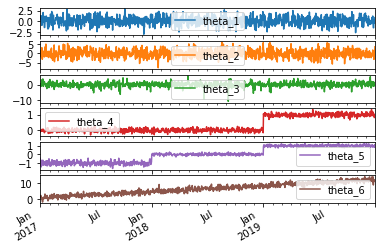

In [17]:
df.plot(subplots=True)

**4. Plot histograms of all columns, verify bin size. Plot all on a single, faceted plot.**

<AxesSubplot:ylabel='Frequency'>

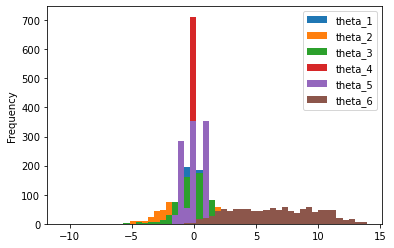

In [18]:
df.plot.hist(bins=50)

**5. Plot KDE-s (Kernel Denisty Estimators) for all columns.**

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

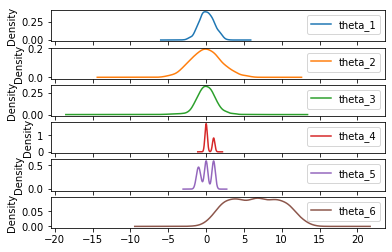

In [19]:
df.plot.density(subplots=True)

**6. Repeat analysis for columns $\theta_1$-$\theta_4$ in 2018.**

In [20]:
df2018=df.loc["2018"]

In [21]:
df2018.head()

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530,0.036404,4.551359
2018-01-02,-0.283107,-0.979955,1.233933,0.158031,-0.097014,4.623086
2018-01-03,1.572221,-2.033528,2.196317,0.041347,0.009982,4.330249
2018-01-04,-1.042981,0.651530,1.060125,0.064832,0.036592,6.617830
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025,0.124576,5.577570


In [22]:
df2018=df2018.drop(columns=['theta_5', 'theta_6'])

In [23]:
df2018.head()

,theta_1,theta_2,theta_3,theta_4
2018-01-01,0.682693,-3.091767,-0.475717,-0.238530
2018-01-02,-0.283107,-0.979955,1.233933,0.158031
2018-01-03,1.572221,-2.033528,2.196317,0.041347
2018-01-04,-1.042981,0.651530,1.060125,0.064832
2018-01-05,-1.392614,-2.570905,-0.600063,-0.015025


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

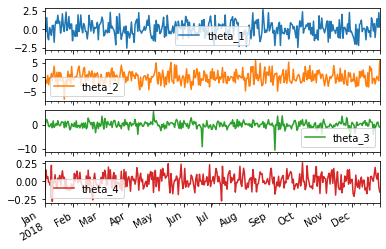

In [24]:
df2018.plot(subplots=True)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

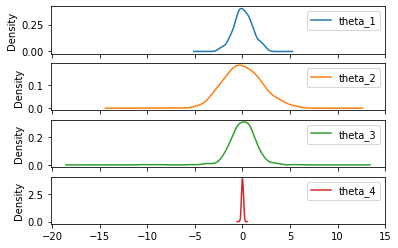

In [25]:
df2018.plot.density(subplots=True)

<AxesSubplot:ylabel='Frequency'>

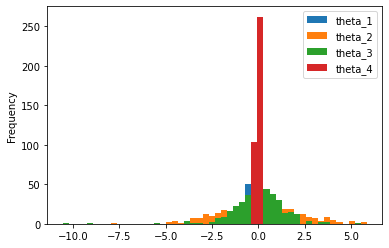

In [27]:
df2018.plot.hist(bins=50)

# EX2

**1. Install ```cmdstanpy``` package**
**2. Install cmdstan**

In [29]:
import cmdstanpy

**3. Create a cmdstanpy model from ```bern_1.stan``` code provided.**

In [30]:
b_model=cmdstanpy.CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: C:/Users/Studia/LAB1-P~1/bern_1.exe


**2. Create a dataset (as a dictionary) of F+L binary samples with F zeros and L ones, with F=number of letters in first name, L=number of letters in last name. Dictionary needs to consist of N=F+L, and y = list of samples.**

In [31]:
im=len("Michal")
na=len("Druciak")

b_data={"N":im+na,
     "y": [0,1,0,0,1,1,1,0,0,1,1,0,1]}

**4. Sample from the model using the dataset and ```.sample()``` method**

In [32]:
bern_fit=b_model.sample(data=b_data,output_dir='sample'#,show_progress=true,,show_progress='notebook'
                       )

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


**5. Extract $\theta$ variable and create its histogram.**

In [33]:
draws_theta=bern_fit.stan_variable(name='theta')

In [34]:
type(draws_theta)

numpy.ndarray

**6. Using ```.summary()``` method get mean, median and 5% and 95% quantiles of theta, and mark them on the histogram.**

In [35]:
basic_stats=bern_fit.summary()
basic_stats

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-11.00,0.0190,0.69,-12.00,-11.00,-10.00,1400.0,11000.0,1.0
theta,0.54,0.0033,0.12,0.34,0.54,0.75,1400.0,11000.0,1.0


In [36]:
type(basic_stats)

pandas.core.frame.DataFrame

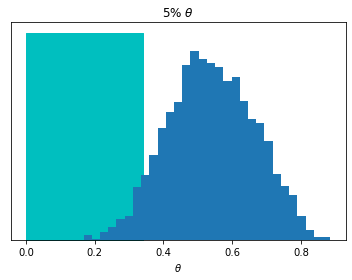

In [64]:
fix,ax=plt.subplots(1,1)
ax.hist(draws_theta,bins=30,density=True)
ax.fill_betweenx([0, 3.4], 0, 0.34, color='c')
ax.set_yticks([])
ax.set_xlabel('$\\theta$')
plt.title('5% $\\theta$')
plt.show()

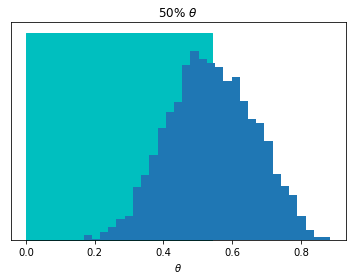

In [65]:
fix,ax=plt.subplots(1,1)
ax.hist(draws_theta,bins=30,density=True)
ax.fill_betweenx([0, 3.4], 0, 0.54, color='c')
ax.set_yticks([])
ax.set_xlabel('$\\theta$')
plt.title('50% $\\theta$')

plt.show()

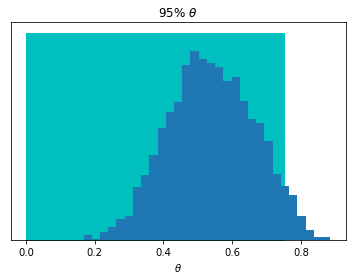

In [66]:
fix,ax=plt.subplots(1,1)
ax.hist(draws_theta,bins=30,density=True)
ax.fill_betweenx([0, 3.4], 0, 0.75, color='c')
ax.set_yticks([])
ax.set_xlabel('$\\theta$')
plt.title('95% $\\theta$')

plt.show()